# Introduction to R

In this short workshop we will assume that people have a basic knowledge of R. If you're new to R, there are many excellent free resources out there, such as the books

* Grolemund, G. (2014). Hands-on programming with R. O'Reilly. [Companion website.](https://rstudio-education.github.io/hopr/)
* Wickham, H., & Grolemund, G. (2016). R for data science: Import, tidy, transform, visualize, and model data (First edition). O’Reilly. [Companion Website.](https://r4ds.hadley.nz/)

If you're following this tutorial, chances are you have already visited the [Github repository](https://github.com/surveygraph) for surveygraph, where we maintain our [tutorial](https://github.com/surveygraph/surveygraph-tutorials) materials, such as notebooks.

## R environments

R is an interpreted language, which means that the language itself requires some sort of application to execute it before it is useful. There are several such applications, each with its pros and cons.

In this workshop I'll be working from what's called a jupyter notebook. The following are different ways of interfacing with the R language, meaning the underlying language and syntax is the same, we're just reading and writing it in different applications.

![An image](https://raw.githubusercontent.com/surveygraph/surveygraph-tutorials/main/presentations/logos.jpg)

### Jupyter notebooks with an R kernel

Great for exposition, [Jupyter notebooks](https://jupyter.org/try) (or JupyterLab) allow a readable mix of code, text, and figures. Text can be formatted in markdown, headings, emphasis, lists, tables, hyperlinks. Cell types, markdown and raw. Keyboard shortcuts. Need to install R and jupyter, and configure with the R package _IRkernel_. Runs locally in a web browser (Chrome, Safari, Firefox etc), but can run on cloud platforms such as google collab. This is a good option if you're really struggling to install everything on your machine. File type is ipynb, similar to json, but can export to other formats. The table of contents is handy and helps to jump between sections.

If using a mouse, click to select a cell, double click to edit the contents of a cell. Shift + enter to execute the contents of a cell. The output of a cell, if there is any, will appear directly below the cell. Arrow keys can be used to select cells, and the enter key enters edit mode. 

### Rstudio

Probably the most well known.

### Shiny apps

These are handy.

### R interpreter in a shell

The most bare-bones if you are familiar with the command line, for instance terminal applications in macos and linux systems. These same systems can execute scripts, which are text files with an `.R` extension.

## Getting information about objects
One of the most terrifying things about R for beginners is that objects are invisible and inscrutable: so you don't know automatically what objects exist and, even if you do, it's not clear from their names what they are or what their structure is. (And, for this reason, it is important to use meaningful and descriptive names for objects).

If you are using RStudio you can view the objects and their structure in various panels in the graphical interface. But if you are in a Jupyter notebook or base R you will need some commands.

Let's create a couple of objects.

In [86]:
var1 <- 256
var2 <- "hello world"

The cell above was our first look at a code cell, that is, one that actually contains R code and not just markdown text. We can add text annotations to code with a pound sign, #. These are called comments.

In [88]:
var3 <- 512 # this is a comment
# this is also a comment

### Listing the objects in an R environment

`ls()` will list all of the objects in the working environment. Don't worry if there are objects you don't recognize: sometimes there are a few automatically generated ones, depending on the platform you are using. Of course, one of the advantages of scripting is that the names of the objects are also available in the script you have written, so more importantly:

In [12]:
ls()

[1] "a_new_variable"    "var1"              "var2"             
[4] "var2yougettheidea"

### Returning the type of an object

The function `typeof()` returns the "type" of an object. Types are integers, doubles, floats, characters, logical.

Each type allows `NA`, which is important in survey data, used to represent missing data.

In [51]:
vec1 <- c('h', 'e', 'l', 'l', 'o')
typeof(vec1)

vec2 <- c(NA, FALSE, TRUE, TRUE)
typeof(vec2)

vec3 <- c(NA, 1, 4, 6.9)
typeof(vec3)

[1] "character"

[1] "logical"

[1] "double"

### Returning the structure of an object

`str()` will summarise the structure of the object. e.g. Is it a character or integer? A vector or an array? This is especially useful for checking the structure of objects returned from functions.

Let's assign a new object, and check that it appears in the environment.

In [13]:
str(var1)
str(var2)

 num 256
 chr "hello world"


## Types of R objects

We give an introduction to the types of data structures, or objects, that are most useful to the surveygraph workflow. The different types of R objects that we'll use are vectors and dataframes. They contain elements whose types are the same, such as integers, characters, floating points. Vectors are indexed from 1. 

### Integer, double and character types

These are the basic types of data

In [131]:
var1 <- 35
# typeof(var1)

var2 <- as.integer(34)
# typeof(var2)

Each data type can take the value NA, which we will frequently see in survey data.

In [17]:
var3 <- NA
# var3

### Vectors

Vectors build upon the basic types. The R language includes the so-called combination function `c()`, which returns a vector composed of the arguments of the function. For example,

In [4]:
vec1 <- c(1, 2, 2, 3)
#str(vec1)

In [3]:
vec2 <- c('a', 1, 3)
#str(vec2)

In [5]:
vec3 <- c(3.14159, 1.0, 2.0)
#str(vec3)

### Dataframes

This is the basic tabular data structure in R, and it is the main data type that we use them in _surveygraph_. The graph visualisation package _igraph_ also reads in dataframes.

In [1]:
df1 <- data.frame(c(1, 2, 4), c(1, 3, 9))
#df1

Now to give the columns names we write

In [2]:
df1 <- data.frame(col1 = c(1, 2, 4), col2 = c(1, NA, 9))
#df1

## Installing and loading packages

In this workshop, every package we need is on the CRAN archive of R packages. There are other way to install packages, but this is the simplest and most convenient. 

`install.packages()` is a base R function, which we can call to install a package that is on CRAN. This function will display an error message if the package name in the parentheses is not hosted on CRAN.

In [23]:
install.packages("surveygraph")

Installing package into ‘/opt/homebrew/lib/R/4.4/site-library’
(as ‘lib’ is unspecified)



The message above looks scary due to the red backdrop, but the package has installed correctly. Part of the installation involves compiling C++ source code. In large packages this process can take some time, but _surveygraph_ is pretty lightweight. Installing it should only take a few seconds.

On a given computer, a package only needs to be installed once. However, we need to load the package each time we start an R session our interpreter of choice (Rstudio, JupyterLab etc). To do this we call the `library()` function.

In [25]:
library("surveygraph")

## Data exploration and plotting

Most of our visualisation will be done using the igraph package, but before we get to that it's helpful to do basic data exploration in R. This is so-called base R, fancier plots can be produced with packages like _ggplot_, but we won't go into that.

### Loading data

Let's read in a dataset that we have on our machine.

# Introduction to graphs

In this section we take a first look at working with network data in R. We use the term graphs and networks interchangably. Some researchers distinguish between the two by saying that graphs are a purely mathematical object, and that networks are real-world graphs.

Let us install and load the _igraph_ package.

## Network data and visualisation

### Definitions

#### graph

A graph _G_ = (_V_, _E_) is defined as a set of nodes denoted by _V_, together with a set of edges denoted by _E_. If nodes _u_ and _v_ are elements of _V_, then an edge (_u_, _v_), which is simply a pair of nodes, is a possible element of _E_. 

For example, if we define a node set to be _V_ = {_Sam_, _Ana_, _Caoimhe_}, then a valid edge set corresponding to that node set is _E_ = {(_Sam_, _Ana_), (_Ana_, _Caoimhe_)}. Another valid edge set is the empty set E = {}, and the complete graph _E_ = {(_Sam_, _Ana_), (_Ana_, _Caoimhe_), (_Sam_, _Caoimhe_)}, where every possible edge is present.

In an undirected graph, the edge (_Sam_, _Caoimhe_) is different to (_Caoimhe_, _Sam_). We introduce direction when it is meaningful in our modelling. For instance, if we wanted to describe who has emailed whom in the last day, we might introduce the edge set _E_ = {(_Sam_, _Ana_), (_Ana_, _Sam_), (_Ana_, _Caoimhe_), (_Sam_, _Caoimhe_)}.

In a weighted graph, we associate a numerical value, called a weight, with each edge. We denote this with a triple, (_u_, _v_, _w_). For example, let's use a graph to describe how many emails were exchanged between us over the last week. Assuming _V_ is the same as before, we have _E_ = {(_Sam_, _Ana_, 6), (_Sam_, _Caoimhe_, 4)}.

#### node

A node is any element of the node set _V_. In the above example, the nodes are _Sam_, _Ana_ and _Caoimhe_. A synonym of node is vertex.

An isolated node is a node that does not form part of an edge.

#### edge

An edge is any element of the edge set _E_. In the above example, the edges are (_Sam_, _Ana_) and (_Ana_, _Caoimhe_). Synonyms of edge are link, arc, tie, or bond.

#### neighbour

A node _v_ is a neighbour of a node _u_ if there is an edge between them. This means that (_u_, _v_) is an element of the edge set _E_ of the corresponding graph.

#### degree

The degree of a node is the number of neighbours that it has. The average degree is a very simple descriptor of graph structure.

#### component

A component, or connected component, of a graph is a maximal set of nodes such that any pair of nodes in the set are connected by a path. 

The largest connected component, or lcc of a graph is the largest such set of nodes. A fully connected graph consists of a single component.

#### density

The density of a graph refers to the fraction of edges that are present, compared to the total number of edges that are possible for a given edge set _V_. For example, if the graph (_V_, _E_) is undirected, and _V_ = {_Sam_, _Ana_, _Caoimhe_} as before, then there are three allowed edges, (_Sam_, _Ana_), (_Ana_, _Sam_), (_Ana_, _Caoimhe_) and (_Sam_, _Caoimhe_).

If no edges are present, E = {}, we say the graph is empty and the density is 0. If one or two edges are present, the density is 0.33 or 0.66 respectively. If all edges are present, the density is 1, and we say the graph is complete.

Related terms are sparse and dense, meaning densities close to 0 and 1, respectively.

<div class='sidenote-cell'>
    <b>Side note...</b>
    <br><br>
    Consider that as a social system increases in size, individuals are subject to constraints. Dunbar's number and sparsity, fraction of actually occupied edges goes to zero.
</div>

### Graph data formats

There are two main ways of describing a graph numerically. Let's assume we have a node set that we extend to include _Paul_, so we now have _V_ = {_Sam_, _Ana_, _Caoimhe_, _Paul_}, and assume an edge set _E_ = {(_Sam_, _Ana_), (_Ana_, _Caoimhe_), (_Sam_, _Caoimhe_), (_Caoimhe_, _Paul_)}.

#### Neighbour list

In a neighbour list, for each node _u_ we list its neighbours.

|_u_|neighbours of _u_|
|:-|:-|
|_Sam_|_Ana_, _Caoimhe_|
|_Ana_|_Sam_, _Caoimhe_|
|_Caoimhe_|_Sam_, _Ana_, _Paul_|
|_Paul_|_Caoimhe_|

#### Edge list

In an edge list, we simply list the edges (_u_, _v_). In a weighted edge list, we list the weighted edges (_u_,_v_,_w_). Introducing weights to the example above we have

|_u_|_v_|_w_|
|:-|:-|:-|
|_Sam_|_Ana_|6|
|_Sam_|_Caoimhe_|7|
|_Ana_|_Caoimhe_|9|
|_Caoimhe_|_Paul_|1|

Provided a graph in one format it is straightforward to map to another. We will use edge lists, which have the advantage of being regular, in the sense that each row has the same number of columns. In R, dataframes are well suited to storing edge lists, since they are regular.

We can write the above example as follows.

In [113]:
# read the variable el1 as "edge list 1"
el1 <- data.frame(
    u = c('Sam', 'Sam', 'Ana', 'Caoimhe'), 
    v = c('Ana', 'Caoimhe', 'Caoimhe', 'Paul'), 
    w = c(6, 7, 9, 1)
)

In the final line we've used the combination function `c()` to concatenate columns _u_ and _v_ of the edge list, then the `unique()` function to remove repeated entries from the resulting vector.

In [47]:
Vinferred <- unique(c(el1$u, el1$v))

### A comment on isolated nodes

When using edge lists, we need to remember to take into account potentially isolated nodes. That is, since they do not form part of an edge, isolated nodes don't appear in an edge list. They may nevertheless be meaningful. Give example.

## Visualising graph data with _igraph_

In [49]:
library("igraph")

The message above looks scary, but we can ignore it. It is telling us that we've loaded a library that introduces a function with the same name as something else in our environment. Since we aren't using these functions, we won't worry too much about them.

In [130]:
el2 <- read.csv("https://raw.githubusercontent.com/surveygraph/surveygraph-tutorials/main/presentations/zachary.csv")

As an exercise, let's see using the `names()` function what name R has given to the columns of the dataframe. This function returns the column names of a dataframe.

In [129]:
# initial names of dataframe 
names(el2)

# rename to 'u' and 'v'
names(el2) <- c('u', 'v')

# new names of dataframe 
names(el2)

[1] "X1" "X2"

[1] "u" "v"

In [111]:
Vinferred <- unique(c(el2$u, el2$v))

g <- graph_from_data_frame(el2, vertices = Vinferred, directed=FALSE)

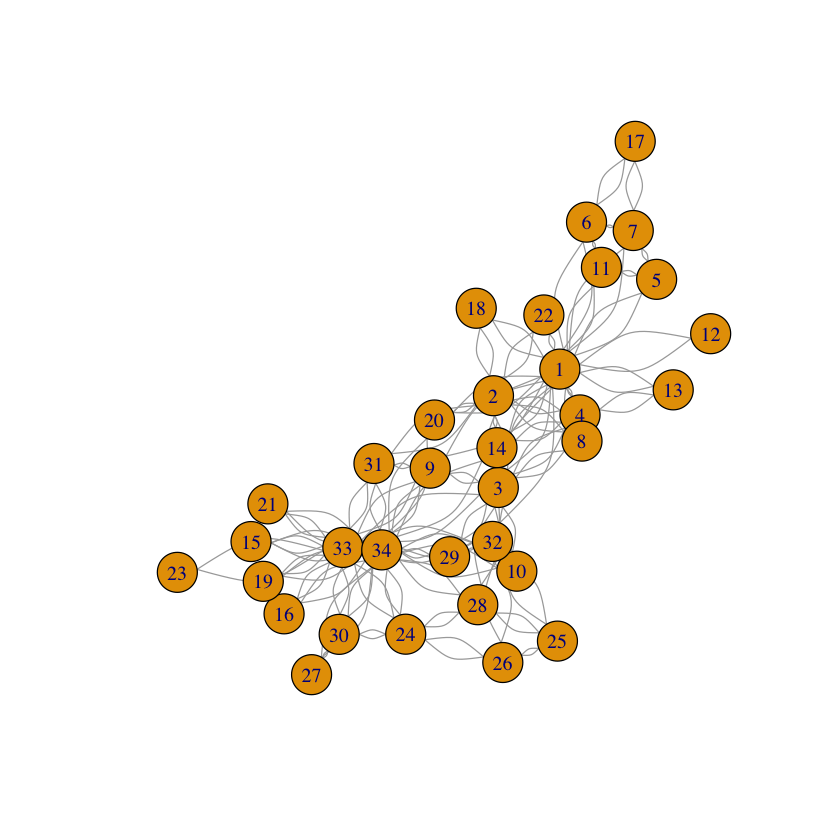

In [109]:
plot(g)

Note that many graph layouts have an element of stochasticity, so the precise layout may not be the same with every realisation of a code snippet.

## Community detection

We briefly describe some popular community detection algorithms, providing the computational complexity of the runtime of each. This is expressed in terms of the number of edges and nodes in the graph, $m$ and $n$ respectively.

### Newman-Girvan

This algorithm detects communities by progressively removing edges with the highest betweenness centrality, thereby breaking down the network into subnetworks that reveal community structures. 

It is implemented in the `cluster_edge_betweenness()` function in _igraph_, with complexity $\mathcal{O}(m^2 n)$.

### Louvain

The Louvain algorithm is an efficient method for detecting communities by iteratively optimizing modularity, which measures the density of links inside communities compared to links between communities, through hierarchical clustering.

It is implemented in the `cluster_louvain()` function in _igraph_, with complexity $\mathcal{O}(n \log n)$.

### Walktrap

The walktrap algorithm identifies communities by simulating random walks on the network, clustering nodes based on the probability of being visited together, thereby capturing community structures through local navigation patterns.

It is implemented in the `cluster_walktrap()` function in _igraph_, with complexity $\mathcal{O}(m n^2)$.

In [25]:
library("igraph")

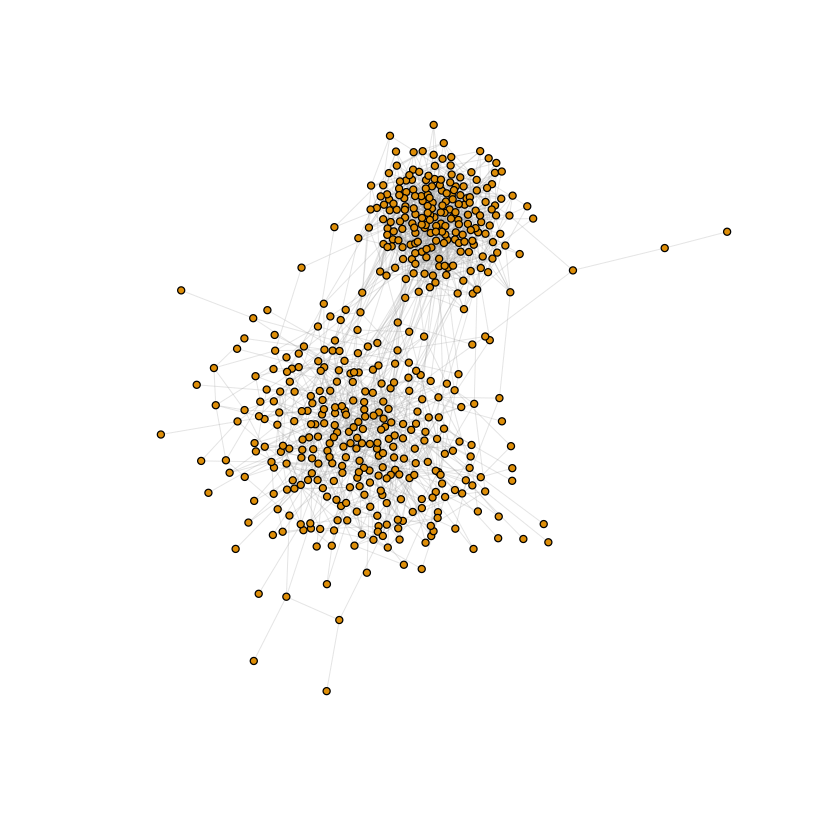

In [32]:
p <- cbind(c(.015, .001), c(.001, .04))
g <- sample_sbm(500, pref.matrix=p, block.sizes=c(300,200))

plot(
    g,
    vertex.size=2.5, 
    vertex.label=NA, 
    edge.width=0.2,
    layout=layout.fruchterman.reingold
)

# Appendix A. Jupyter notebook configuration

After installing JupyterLab, we need to install the R library [_IRkernel_](https://github.com/IRkernel). This allows us to use the R language within a Jupyter notebook. It is also possible to set a Python kernel. We install _IRkernel_ in the usual way, namely by starting an R session and entering
```
install.packages('IRkernel')
```
Then, when running a Jupyter notebook, we will be given a choice of kernel to run, including R. By installing _IRkernel_, we also install the functions in the package _IRdisplay_, which is a package for using HTML and CSS to format Jupyter notebook cells. Let us load this now.

I have used this to add background colour to certain cells, for example. This is defined in the following cell.

In [120]:
library('IRdisplay')

This allows us to define custom styles. Below we define the style used in our "side note" markdown cells, distinguished by the coloured backgrounds.

In [123]:
# define custom CSS styles
customcss <- "
<style>
  .sidenote-cell {
    background-color: lightblue;
    padding: 10px;
    width: calc(100% + 40px);
    margin-left: -10px;
    box-sizing: border-box;
    overflow-x: hidden;
  }
</style>
"

# display the custom CSS styles
IRdisplay::display_html(customcss)